<a href="https://colab.research.google.com/github/lambhua/Sentiment_Analysis/blob/master/Product_Sentiment_Analysis_(_Fortune_OIL)_using_customer_reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement - A entity wants to know customer sentiments about    Fortune Soyabean Oil on Amazon
Steps -
    1-Web Scrapping of Amazon first 3 pages of Reviews for Fortune Oil
    2-Using pretrained NLTK Sentiment Analyser to tag sentiments
    3-Pie Chart using Matplotlib
    4- Wordcloud to visualize freq of words
    5-Very small size data used but we get a holistic view of customer sentiments about this product

# Findings :
    
    Major Problem detected is leakeage of oil
    70% customers are happy with the product but 30% have issues or are nearly neutral in reviews
    30% Customers may switch to other Oils
    Leakeage problem needs to be addressed(It may be due to transportation mishandling,packaging issues )

**importing all necessary modules**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib

**URLs for scrapping**

In [ ]:
url="https://www.amazon.in/Fortune-Soyabean-Oil-1L-Pouch/product-reviews/B00TX50T4K/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber"


In [ ]:
url1="https://www.amazon.in/Fortune-Soyabean-Oil-1L-Pouch/product-reviews/B00TX50T4K/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber-1"
url2="https://www.amazon.in/Fortune-Soyabean-Oil-1L-Pouch/product-reviews/B00TX50T4K/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber-2"
url3="https://www.amazon.in.in/Fortune-Soyabean-Oil-1L-Pouch/product-reviews/B00TX50T4K/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber-3"

**Fetching the data**

In [ ]:
data1=urllib.request.urlopen(url1).read()
data2=urllib.request.urlopen(url2).read()
data3=urllib.request.urlopen(url3).read()


In [ ]:
data=data1+data2+data3

**Parsing data with Beautiful Soup Library**

In [ ]:
reviews=BeautifulSoup(data,'html.parser')
con= reviews.find_all('div',class_="a-row a-spacing-small review-data")


In [ ]:
comments=[]
for i in con:
        review=i.find('span').text
        comments.append(review)

In [ ]:
comments=[w.replace('\n','')for w in comments]

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatize=WordNetLemmatizer()
from nltk.corpus import stopwords
words=stopwords.words('english')
import re

In [ ]:
cleaned_reviews=[]
for review in comments:
    review= re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|\...|([0-9]+)"," ",review)
    review=word_tokenize(review)
    review=[w for w in review if w.lower() not in words]
    review=[lemmatize.lemmatize(w) for w in review]
    review=" ".join(review)
    cleaned_reviews.append(review)

In [ ]:
cleaned_reviews[0:5]

['Good product reasonably priced Good quality',
 'Oil leaked delivery time Otherwise overall good',
 'originality Soyabean oil totally expressed fortune soyabean oil fantastic product must buy Amazon India love Amazon India',
 'Nice',
 'medium could loaded Normal jaise hum market sa purchase karta hai vaisa hi hai aur taste thik hai purchase kar sakta hai']

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [ ]:
df=pd.DataFrame(cleaned_reviews,columns=['review'])
df['score']=df['review'].apply(lambda x : sia.polarity_scores(x))
df['compound']=df['score'].apply(lambda x:x['compound'])
df['sentiment']=df['compound'].apply(lambda x : 'pos'if x>0 else 'neg')

In [ ]:
df.head()

,review,score,compound,sentiment
0,Good product reasonably priced Good quality,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.7003,pos
1,Oil leaked delivery time Otherwise overall good,"{'neg': 0.225, 'neu': 0.49, 'pos': 0.284, 'com...",0.1531,pos
2,originality Soyabean oil totally expressed for...,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...",0.8807,pos
3,Nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,pos
4,medium could loaded Normal jaise hum market sa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     30 non-null     object 
 1   score      30 non-null     object 
 2   compound   30 non-null     float64
 3   sentiment  30 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [ ]:
sentiment_dataframe=df.drop(['score','compound'],axis=1)
positive=sentiment_dataframe['sentiment'].value_counts()['pos']
negative=sentiment_dataframe['sentiment'].value_counts()['neg']

**Visualisation**

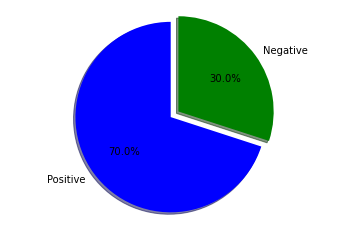

In [ ]:
#Creating pie chart
labels = 'Positive', 'Negative'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie([positive,negative], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True,colors=['blue','green'], startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#Filtering records with negative tags from dataframe
negative_data=sentiment_dataframe[(sentiment_dataframe.sentiment=='neg')]
negative_data.reset_index()
negative_data

,review,sentiment
4,medium could loaded Normal jaise hum market sa...,neg
5,Cooking Oil daily requirement cook meal reason...,neg
6,pouch leaking,neg
14,medium could loaded Normal jaise hum market sa...,neg
15,Cooking Oil daily requirement cook meal reason...,neg
16,pouch leaking,neg
24,medium could loaded Normal jaise hum market sa...,neg
25,Cooking Oil daily requirement cook meal reason...,neg
26,pouch leaking,neg


In [ ]:
''.join(negative_data['review'].values)

'medium could loaded Normal jaise hum market sa purchase karta hai vaisa hi hai aur taste thik hai purchase kar sakta haiCooking Oil daily requirement cook meal reasonably priced opinionpouch leakingmedium could loaded Normal jaise hum market sa purchase karta hai vaisa hi hai aur taste thik hai purchase kar sakta haiCooking Oil daily requirement cook meal reasonably priced opinionpouch leakingmedium could loaded Normal jaise hum market sa purchase karta hai vaisa hi hai aur taste thik hai purchase kar sakta haiCooking Oil daily requirement cook meal reasonably priced opinionpouch leaking'

**WORDCLOUD Visualisation**

In [ ]:
# importing all necessary modules for wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


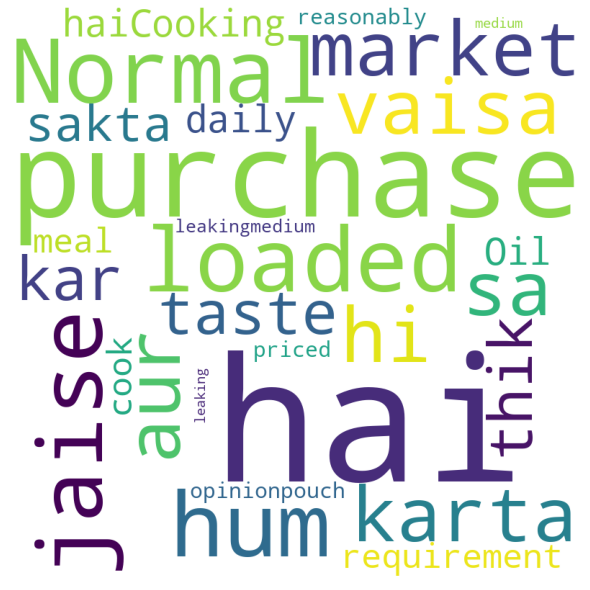

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(''.join(negative_data['review'].values))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
